In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [3]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [4]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [5]:
SSP1_26_o2=google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
SSP1_26_o2

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15681,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [6]:
SSP1_26_o2sat=google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
SSP1_26_o2sat

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15679,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [7]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore_SSP1_26_o2sat = SSP1_26_o2sat.zstore.values[-1]
zstore_SSP1_26_o2 = SSP1_26_o2.zstore.values[-1]

In [8]:
# create a mutable-mapping-style interface to the store
mapper_SSP1_26_o2sat = gcs.get_mapper(zstore_SSP1_26_o2sat)
mapper_SSP1_26_o2 = gcs.get_mapper(zstore_SSP1_26_o2)

In [9]:
# open the dataset using xarray and zarr
O2sat_SSP126 = xr.open_zarr(mapper_SSP1_26_o2sat, 
                                consolidated=True,use_cftime=True).o2sat
O2_SSP126 = xr.open_zarr(mapper_SSP1_26_o2, 
                                consolidated=True,use_cftime=True).o2

In [10]:
O2sat_SSP126

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [11]:
O2sat=O2sat_SSP126.rename({'lat':'latitude','lon':'longitude'})
O2sat

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [12]:
O2_SSP126

<xarray.DataArray 'o2' (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [13]:
O2=O2_SSP126.rename({'lat':'latitude','lon':'longitude'})
O2

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [14]:
SSP126_AOU=O2_SSP126-O2sat_SSP126
SSP126_AOU

<xarray.DataArray (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [15]:
AOU=SSP126_AOU.rename({'lat':'latitude','lon':'longitude'})
AOU

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [16]:
#importing basin masks
esm4_basins = xr.open_dataset('../data/basins/esm4_basins_gr.nc').basins

Text(0.5, 1.0, 'Ocean Basin Mask')

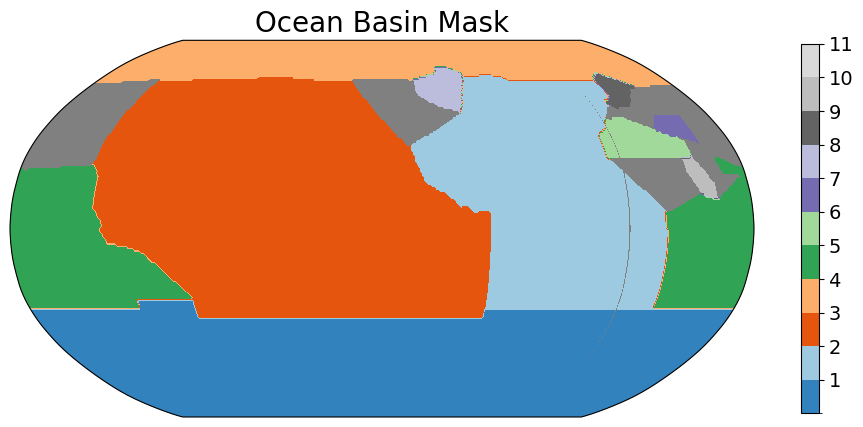

In [17]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [18]:
southernocean = (esm4_basins.where(esm4_basins==1) / esm4_basins.where(esm4_basins==1))
atlanticocean = (esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2))
pacificocean = (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3))
arcticocean = (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4))
indianocean = (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5))

In [19]:
O2sat_last20=O2sat.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time')

In [20]:
Osl20_upper=O2sat_last20.sel(lev=slice(0,1000)).mean(dim='lev')

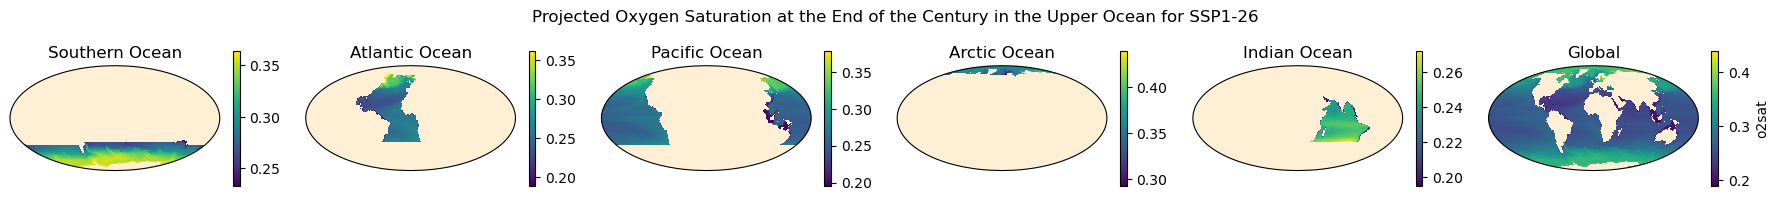

In [31]:
subplot_kws=dict(projection=ccrs.Mollweide(),
                 facecolor='papayawhip')

fig, (ax)=plt.subplots(ncols=6,nrows=1, figsize=(18,2),subplot_kw=subplot_kws)
(Osl20_upper*southernocean).plot(ax=ax[0],transform=ccrs.PlateCarree())

(Osl20_upper*atlanticocean).plot(ax=ax[1],transform=ccrs.PlateCarree())

(Osl20_upper*pacificocean).plot(ax=ax[2],transform=ccrs.PlateCarree())

(Osl20_upper*arcticocean).plot(ax=ax[3], transform=ccrs.PlateCarree())

(Osl20_upper*indianocean).plot(ax=ax[4],transform=ccrs.PlateCarree())

Osl20_upper.plot(ax=ax[5],transform=ccrs.PlateCarree())

ax[0].set_title('Southern Ocean')
ax[1].set_title('Atlantic Ocean')
ax[2].set_title('Pacific Ocean')
ax[3].set_title('Arctic Ocean')
ax[4].set_title('Indian Ocean')
ax[5].set_title('Global')

fig.suptitle('Projected Oxygen Saturation at the End of the Century in the Upper Ocean for SSP1-26')
plt.tight_layout()

**Figure 1.** This figure displays six subplots that display the projected oxygen saturation at the end of the century in the upper ocean divided by basin and also displayed globally. The upper ocean is defined as the first 1000 meters in the ocean, this was sliced from the data then averaged to make this variable in one dimension to be plotted in the 3D plot. Oxygen saturation is displayed as a percentage (actual oxygen concentration divided by maximum oxygen concentration in a given area). The time period is defined as the last 20 years of the simulation, 2081-2100. Oxygen saturation projection data was gathered from the Google CLoud storage of NOAA's GFDL-ESM4 model SSP scenario 1-26 (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv). 

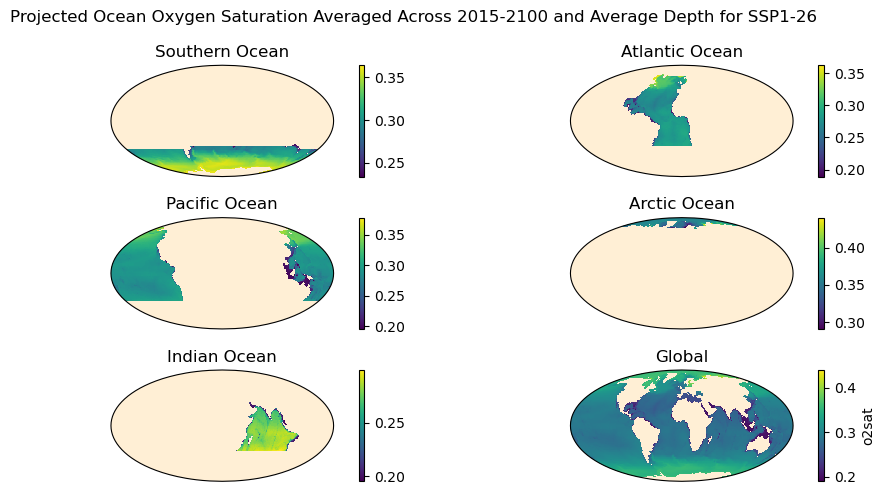

In [36]:
subplot_kws=dict(projection=ccrs.Mollweide(),
                 facecolor='papayawhip')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)
(O2sat*southernocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,0],
                              transform=ccrs.PlateCarree())
(O2sat*atlanticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,1],
                                transform=ccrs.PlateCarree())
(O2sat*pacificocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,0],
                              transform=ccrs.PlateCarree())
(O2sat*arcticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,1],
                              transform=ccrs.PlateCarree())
(O2sat*indianocean).mean(dim='lev').mean(dim='time').plot(ax=ax[2,0],
                              transform=ccrs.PlateCarree())
O2sat.mean(dim='lev').mean(dim='time').plot(ax=ax[2,1],
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

fig.suptitle('Projected Ocean Oxygen Saturation Averaged Across 2015-2100 and Average Depth for SSP1-26')
plt.tight_layout()

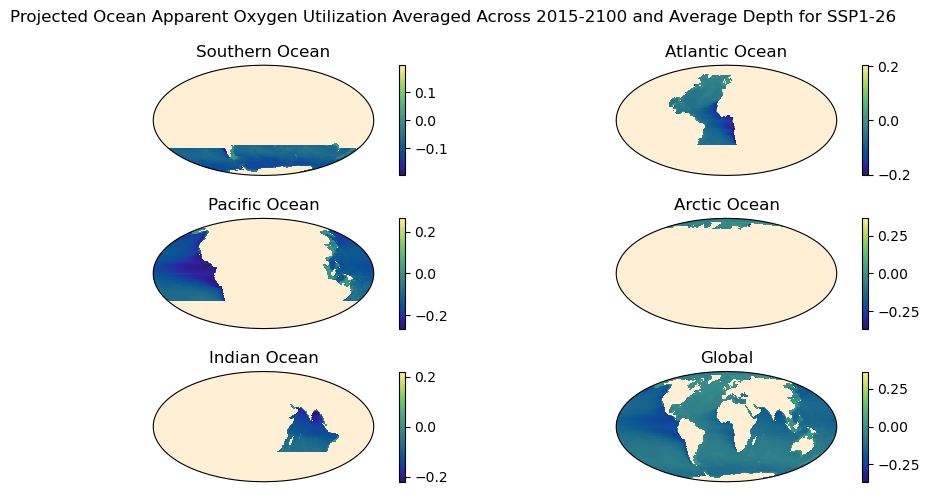

In [37]:
subplot_kws=dict(projection=ccrs.Mollweide(), 
                 facecolor='papayawhip')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)
(AOU*southernocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,0], cmap=cmocean.cm.haline,
                              transform=ccrs.PlateCarree())
(AOU*atlanticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,1], cmap=cmocean.cm.haline,
                                transform=ccrs.PlateCarree())
(AOU*pacificocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,0], cmap=cmocean.cm.haline,
                              transform=ccrs.PlateCarree())
(AOU*arcticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,1], cmap=cmocean.cm.haline, 
                              transform=ccrs.PlateCarree())
(AOU*indianocean).mean(dim='lev').mean(dim='time').plot(ax=ax[2,0], cmap=cmocean.cm.haline, 
                              transform=ccrs.PlateCarree())
AOU.mean(dim='lev').mean(dim='time').plot(ax=ax[2,1], cmap=cmocean.cm.haline,
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

fig.suptitle('Projected Ocean Apparent Oxygen Utilization Averaged Across 2015-2100 and Average Depth for SSP1-26')
plt.tight_layout()

In [54]:
avgO2=O2.mean(dim='lev').mean(dim='longitude').mean(dim='latitude')

In [61]:
O2_first20=avgO2.sel(time=slice('2015-01-16','2035-12-16'))

In [59]:
avgO2_50=avgO2.sel(time=slice('2050-01-16','2050-12-16')).groupby('time.month').mean(dim='time')

In [62]:
O2_last20=avgO2.sel(time=slice('2081-01-16','2100-12-16'))

In [63]:
avgf20=O2_first20.groupby('time.month').mean(dim='time')
avgl20=O2_last20.groupby('time.month').mean(dim='time')
stdf20=O2_first20.groupby('time.month').std(dim='time')
stdl20=O2_first20.groupby('time.month').std(dim='time')

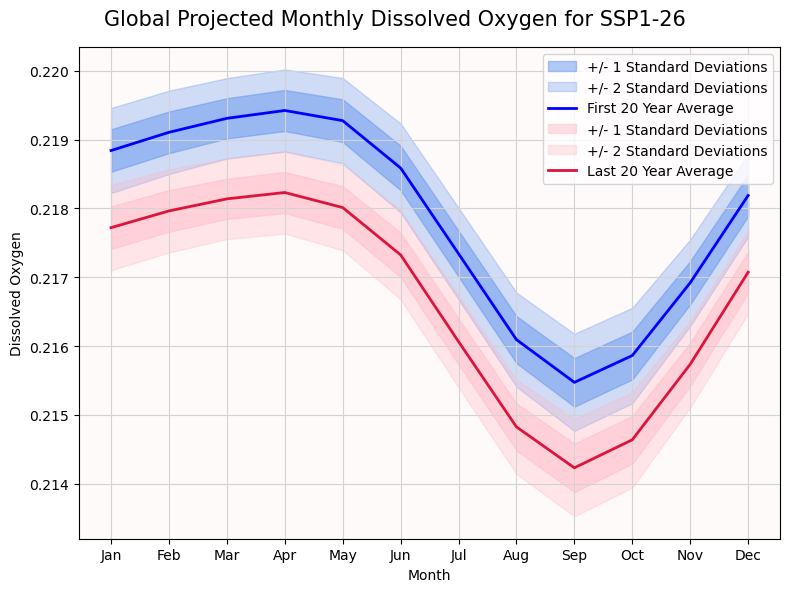

In [66]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Global Projected Monthly Dissolved Oxygen for SSP1-26', fontsize=15)

ax.grid(color='lightgrey')

ax.fill_between(avgf20['month'], avgf20+stdf20,avgf20-stdf20, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='cornflowerblue')
ax.fill_between(avgf20['month'], avgf20+(2*stdf20),avgf20-(2*stdf20), 
                label='+/- 2 Standard Deviations',alpha=0.3, color='cornflowerblue')
ax.plot(avgf20['month'], 
        avgf20, linewidth=2, label='First 20 Year Average', color='blue')

ax.fill_between(avgl20['month'], avgl20+stdl20,avgl20-stdl20, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='pink')
ax.fill_between(avgl20['month'], avgl20+(2*stdl20),avgl20-(2*stdl20), 
                label='+/- 2 Standard Deviations',alpha=0.3, color='lightpink')
ax.plot(avgl20['month'], 
        avgl20, linewidth=2, label='Last 20 Year Average', color='crimson')

ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.legend()
ax.set_ylabel('Dissolved Oxygen')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()
#two lines, one first 20 one last 20, w stdevs of those

**Figure 2.** Plotted is the seasonal beginning and end of the century (first and last 20 years) projected dissolved oxygen content in mol/m^3. Standard deviations of the dissolved oxygen content at the first and second degree are also displayed on the graph. Latitude, longitude, and depth are averaed in order to produce a two dimensional plot. Data was collected from NOAA's GFDL-ESM4 model from the SSP scenario 1-26 on Google Cloud (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv).

In [25]:
O2satsouthern=(O2sat*southernocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')
O2satatlantic=(O2sat*atlanticocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')
O2satindian=(O2sat*indianocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')
O2satarctic=(O2sat*arcticocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')
O2satpacific=(O2sat*pacificocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')

In [29]:
southern_diff=(O2satsouthern.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satsouthern.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))
atlantic_diff=(O2satatlantic.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satatlantic.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))
indian_diff=(O2satindian.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satindian.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))
arctic_diff=(O2satarctic.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satarctic.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))
pacific_diff=(O2satpacific.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satpacific.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))

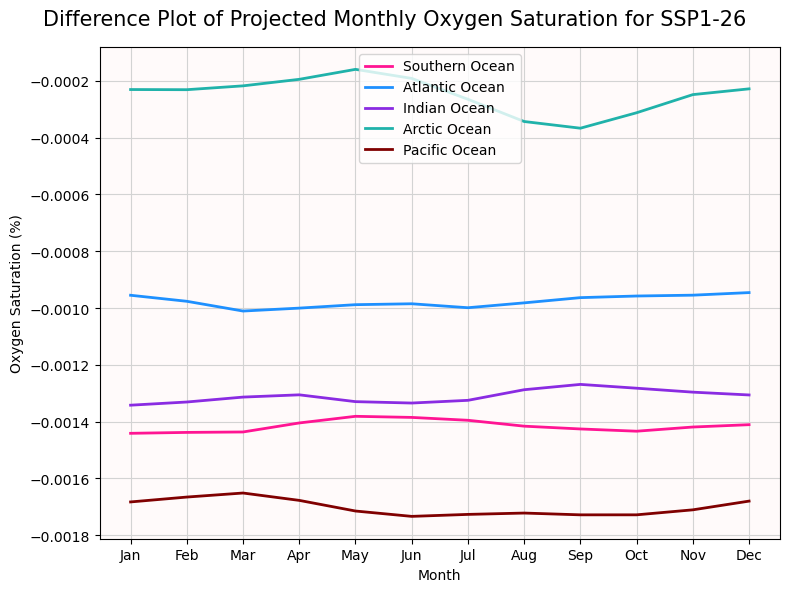

In [69]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Difference Plot of Projected Monthly Oxygen Saturation for SSP1-26', fontsize=15)

ax.grid(color='lightgrey')

ax.plot(southern_diff['month'], southern_diff, linewidth=2, label='Southern Ocean', color='deeppink')
ax.plot(atlantic_diff['month'], atlantic_diff, linewidth=2, label='Atlantic Ocean', color='dodgerblue')
ax.plot(indian_diff['month'], indian_diff, linewidth=2, label='Indian Ocean', color='blueviolet')
ax.plot(arctic_diff['month'], arctic_diff, linewidth=2, label='Arctic Ocean', color='lightseagreen')
ax.plot(pacific_diff['month'], pacific_diff, linewidth=2, label='Pacific Ocean', color='maroon')

ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.legend()
ax.set_ylabel('Oxygen Saturation (%)')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()

**Figure 3.** Difference plot of monthly oxygen saturation (%) of the ocean divided into five ocean basins: Atlantic, Southern, Indian, Pacific, and Atlantic. Difference was calculated by the last 20 years of the century minus the first 20 years of the century. Once each ocean basin was extracted, latitude longitude and depth were averaged to create a two dimensional data set. Data was collected from NOAA's GFDL-ESM4 model from the SSP scenario 1-26 from Google Cloud (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv).

In [22]:
start_AOU=AOU.mean(dim='latitude').mean(dim='longitude')

In [23]:
AOU_upper=start_AOU.sel(lev=slice(0,1000))
AOU_middle=start_AOU.sel(lev=slice(1000, 3000))
AOU_lower=start_AOU.sel(lev=slice(3000, 6500))

In [24]:
avg_upper=AOU_upper.mean(dim='lev')
std_upper=AOU_upper.std(dim='lev')
avg_middle=AOU_middle.mean(dim='lev')
std_middle=AOU_middle.std(dim='lev')
avg_lower=AOU_lower.mean(dim='lev')
std_lower=AOU_lower.std(dim='lev')

In [25]:
upper_ml=ml.util.annual_average(avg_upper, tcoord='time')
middle_ml=ml.util.annual_average(avg_middle, tcoord='time')
lower_ml=ml.util.annual_average(avg_lower, tcoord='time')

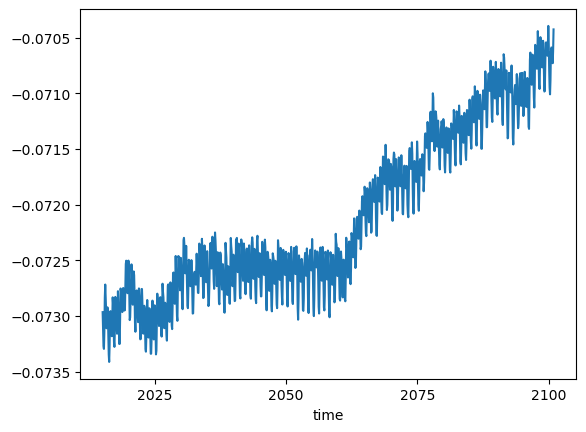

In [39]:
AOU_upper.mean(dim='lev').plot()

#SST_annual = ml.util.annual_average(SST_monthly,tcoord='time')

CPU times: user 2min 24s, sys: 1min 15s, total: 3min 39s
Wall time: 1min 1s


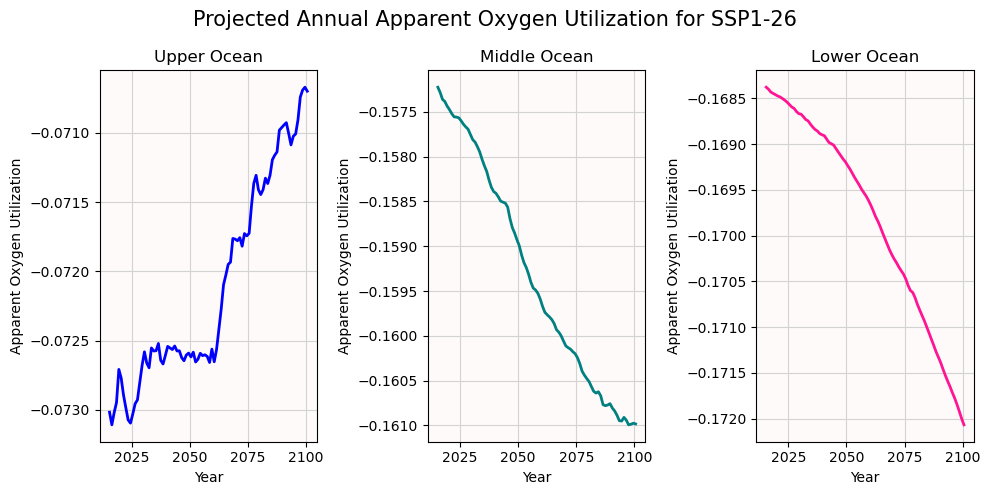

In [52]:
%%time
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))

fig.suptitle('Projected Annual Apparent Oxygen Utilization for SSP1-26', fontsize=15)

ax1.plot(upper_ml['time'], 
      upper_ml, linewidth=2, 
        label='Upper Ocean', color='blue')

ax2.plot(middle_ml['time'], 
       middle_ml, linewidth=2, label='Middle Ocean', color='teal')


ax3.plot(lower_ml['time'], 
       lower_ml, linewidth=2,label='Lower Ocean', color='deeppink')

ax1.set_ylabel('Apparent Oxygen Utilization')
ax1.set_xlabel('Year')
ax1.set_facecolor('snow')
ax1.grid(color='lightgrey')
ax1.set_title('Upper Ocean')

ax2.set_ylabel('Apparent Oxygen Utilization')
ax2.set_xlabel('Year')
ax2.set_facecolor('snow')
ax2.grid(color='lightgrey')
ax2.set_title('Middle Ocean')

ax3.set_ylabel('Apparent Oxygen Utilization')
ax3.set_xlabel('Year')
ax3.set_facecolor('snow')
ax3.grid(color='lightgrey')
ax3.set_title('Lower Ocean')

plt.tight_layout()

**Figure 4.** Three plots of different levels of the ocean displaying the timeseries of apparent oxygen utilization(AOU). AOU was calculated by subtracting oxygen content from oxygen saturation. The upper ocean is from depth 0-1000 meters, middle ocean is 1000-3500 meters, and the lower ocean is 3500-6500 meters. Once divided up, longitude latitude and depth were averaged to create a two dimensional plot. Momlevel was used to create a weighted temporal average to get annual measurements from the monthly measurements. Data was collected from NOAA's GFDL-ESM4 model from the SSP scenario 1-26 from Google Cloud (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv).

Text(0.5, 1.0, 'Southern Ocean Zonal Dissolved Oxygen: SSP1-26')

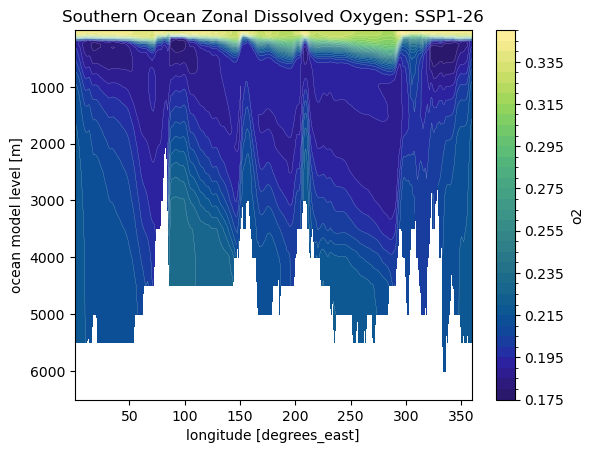

In [45]:
southern_zonal=O2.sel(latitude='-60.5').mean(dim='time')
southern_zonal.plot.contourf(yincrease=False, levels=40, 
                            cmap=cmocean.cm.haline)
southern_zonal.plot.contour(yincrease=False, colors='white',linewidths=0.1,
                       levels=40)
plt.title('Southern Ocean Zonal Dissolved Oxygen: SSP1-26')

Text(0.5, 1.0, 'Pacific and Atlantic Ocean Zonal Dissolved Oxygen: SSP1-26')

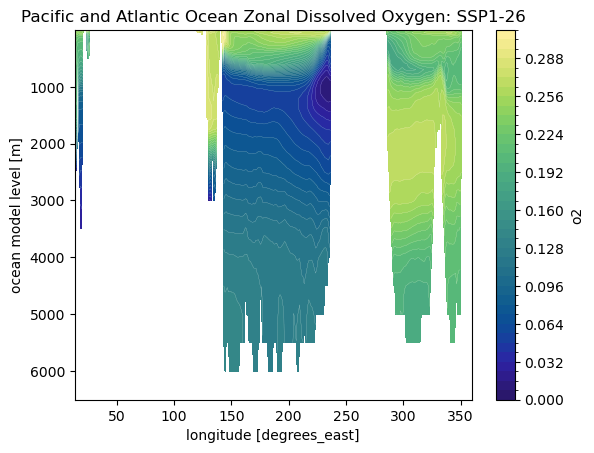

In [75]:
atlantic_zonal=O2.sel(latitude='38.5').sel(longitude=slice('125','360')).mean(dim='time')
atlantic_zonal.plot.contourf(yincrease=False, levels=40, 
                            cmap=cmocean.cm.haline)
atlantic_zonal.plot.contour(yincrease=False, colors='white',linewidths=0.1,
                       levels=40)
plt.title('Pacific and Atlantic Ocean Zonal Dissolved Oxygen: SSP1-26')

**Figure 5.** Zonal plot of a slice at latitude of 38.5 displaying oxygen concentration across ocean basins at the selected depth. Time is averaged so it displays the time averaged values from across the data set. Note the higher oxygen content in the Arctic ocean compared to the Pacific. Data was collected from NOAA's GFDL-ESM4 model from the SSP scenario 1-26 from Google Cloud (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv).

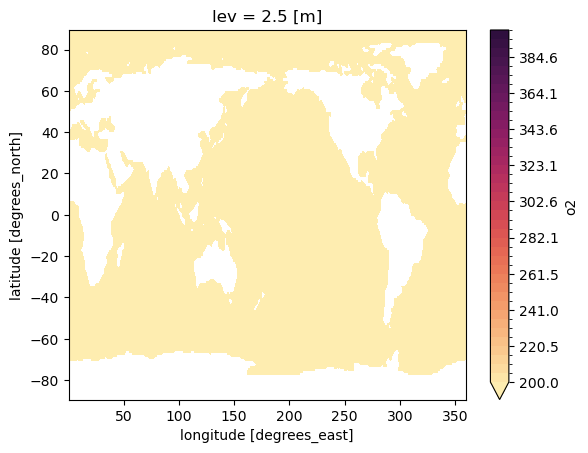

In [60]:
O2.sel(lev=0,method='nearest').mean(dim='time').plot.contourf(vmin=200,                  
                       vmax=400,cmap=cmocean.cm.matter,
                       levels=40)

In [27]:
O2_avg = O2.mean(dim=['latitude','longitude','lev'])
O2sat_avg=O2sat.mean(dim=['latitude','longitude','lev'])
AOU_avg = AOU.mean(dim=['latitude','longitude','lev'])

In [28]:
O2_ml=ml.util.annual_average(O2_avg, tcoord='time')
O2sat_ml=ml.util.annual_average(O2sat_avg, tcoord='time')
AOU_ml=ml.util.annual_average(AOU_avg, tcoord='time')

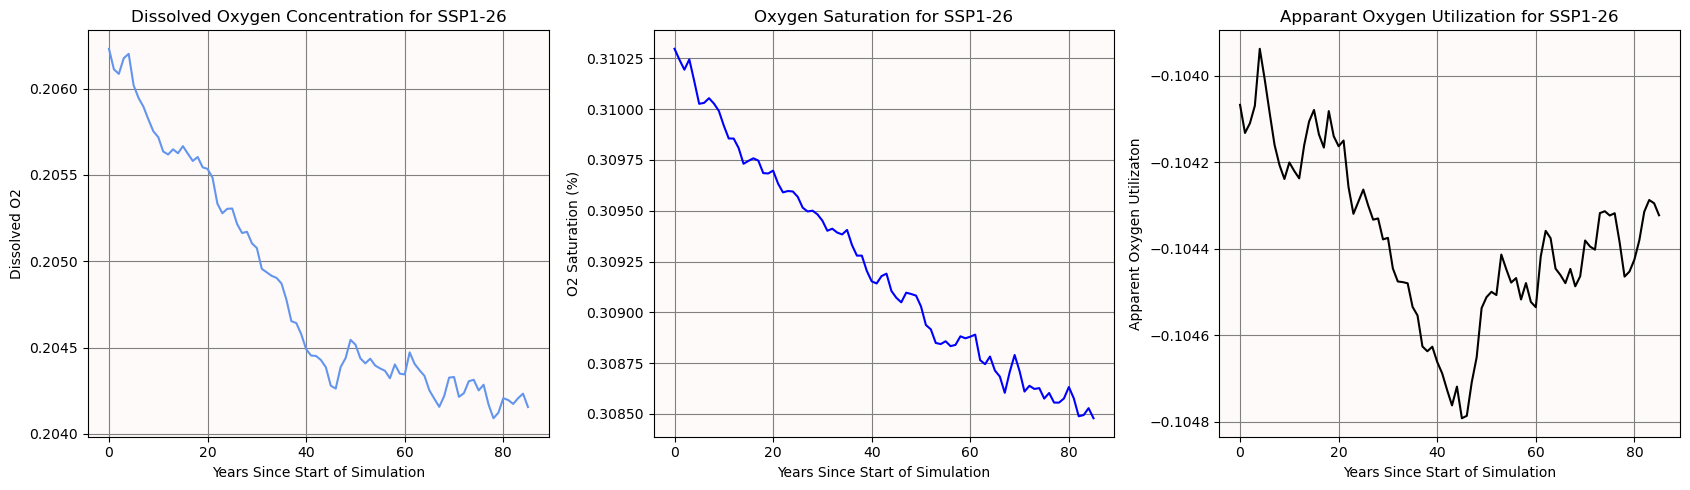

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(17,5))


ax1.plot(O2_ml, color = 'cornflowerblue')
ax2.plot(O2sat_ml, color='blue')
ax3.plot(AOU_ml, color = 'black')

ax1.set_title('Dissolved Oxygen Concentration for SSP1-26')
ax2.set_title('Oxygen Saturation for SSP1-26')
ax3.set_title('Apparant Oxygen Utilization for SSP1-26')

ax1.grid(color='grey')
ax2.grid(color='grey')
ax3.grid(color='grey')

ax1.set_facecolor('snow')
ax2.set_facecolor('snow')
ax3.set_facecolor('snow')

ax1.set_xlabel('Years Since Start of Simulation')
ax2.set_xlabel('Years Since Start of Simulation')
ax3.set_xlabel('Years Since Start of Simulation')

ax1.set_ylabel('Dissolved O2')
ax2.set_ylabel('O2 Saturation (%)')
ax3.set_ylabel('Apparent Oxygen Utilizaton')

plt.tight_layout()

**Figure 6.** Three time series displaying from left to right: oxygen content, oxygen saturation, and apparent oxygen utilization. Apparent oxygen utilization was calculated by subtracting oxygen saturation from oxygen content. Latitude, longitude, and depth were averaged to achieve a two dimensional data set. Momlevel was used to reduce noise and temporally weight monthly data to become yearly data. Data was collected from NOAA's GFDL-ESM4 model from the SSP scenario 1-26 from Google Cloud (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv).

In [23]:
diff_O2sat_SSP126=(O2sat.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2sat.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))
diff_AOU_SSP126=(AOU.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    AOU.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

Text(0.5, 1.0, 'Zonal Average Difference of Dissolved Oxygen Content for SSP1-26')

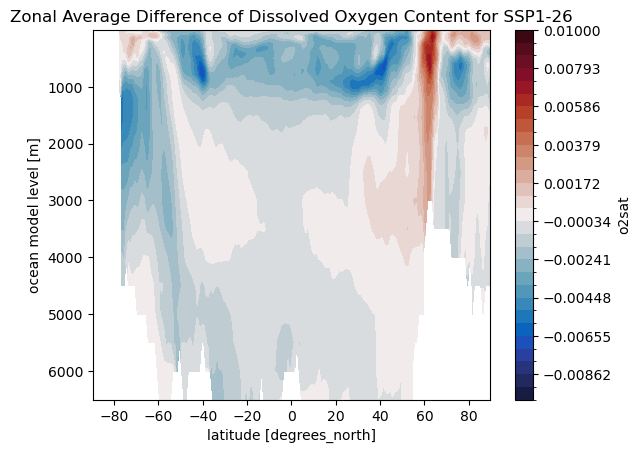

In [35]:
zd_126_02sat= diff_O2sat_SSP126.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.01,vmax=0.01, levels=30)
plt.title('Zonal Average Difference of Dissolved Oxygen Content for SSP1-26')

**Figure 7.** Zonal plot of the end of the century and beginning of the century difference in oxygen saturation. The difference was calulated by taking data from the last 20 years (2081-2100) and subtracting the first 20 years (20155-2035). This was then averaged along with longitude to result in a three dimensional data set. Data was collected from NOAA's GFDL-ESM4 model from the SSP scenario 1-26 from Google Cloud (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv).

Text(0.5, 1.0, 'Zonal Average Difference of Apparent Oxygen Utilization for SSP1-26')

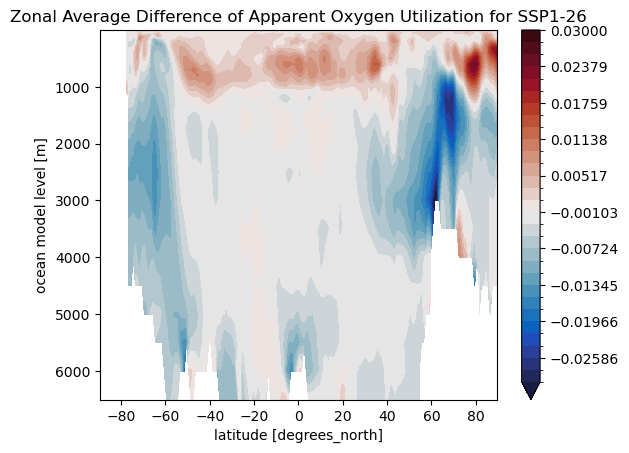

In [31]:
zd_126_AOU= diff_AOU_SSP126.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03, levels=30)
plt.title('Zonal Average Difference of Apparent Oxygen Utilization for SSP1-26')

**Figure 7.** Zonal plot of the end of the century and beginning of the century difference in apparent oxygen utilization. Apparent oxygen utilization was calculated by subtracting oxygen saturation from oxygen content. The difference was calulated by taking data from the last 20 years (2081-2100) and subtracting the first 20 years (20155-2035). This was then averaged along with longitude to result in a three dimensional data set. Data was collected from NOAA's GFDL-ESM4 model from the SSP scenario 1-26 from Google Cloud (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv).

**Note:** Some more figures were made in the process of creating this notebook/exploration, but many were altered drastically or deleted in order to find the story this data tells.